In [46]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.preprocessing import LabelEncoder
from skimage.transform import resize
from sklearn.model_selection import train_test_split

from PIL import Image

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import glob

In [31]:
washington_data = pd.DataFrame([file for file in glob.iglob("data/**/*.jpg", recursive=True)])

washington_data = pd.DataFrame(washington_data[0])
washington_data.head()

,0
0,"data\images\11th Street Bridge, Tacoma, Washin..."
1,"data\images\11th Street Bridge, Tacoma, Washin..."
2,"data\images\11th Street Bridge, Tacoma, Washin..."
3,"data\images\11th Street Bridge, Tacoma, Washin..."
4,"data\images\11th Street Bridge, Tacoma, Washin..."


In [36]:
washington_data['image_data'] = washington_data[0].apply(lambda x : np.asarray(Image.open(x)) / 255)

In [39]:
washington_data[[0, 1, 'name', 'image_id']] = washington_data[0].str.split("\\", expand = True)

In [41]:
washington_data_cleaned = washington_data[['name', 'image_id', 'image_data']]

In [42]:
washington_data_cleaned.head()

,name,image_id,image_data
0,"11th Street Bridge, Tacoma, Washington",0447fbacd8534e5e.jpg,"[[[0.44313725490196076, 0.4588235294117647, 0...."
1,"11th Street Bridge, Tacoma, Washington",0805c26baca7ad07.jpg,"[[[0.7725490196078432, 0.7803921568627451, 0.7..."
2,"11th Street Bridge, Tacoma, Washington",3b5c52054d553033.jpg,"[[[0.5019607843137255, 0.6235294117647059, 0.8..."
3,"11th Street Bridge, Tacoma, Washington",7910361ab975cd2f.jpg,"[[[0.8196078431372549, 0.8823529411764706, 0.9..."
4,"11th Street Bridge, Tacoma, Washington",8eb51ab5811b2c98.jpg,"[[[0.25882352941176473, 0.3411764705882353, 0...."


In [43]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
labels = label_encoder.fit_transform(washington_data_cleaned['name'])

In [44]:
washington_images_stack = np.stack(washington_data_cleaned['image_data'], axis=0)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(washington_images_stack, labels, test_size=0.1)

In [56]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))  # Prevent overfitting
model.add(layers.Dense(306))

In [57]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=25, validation_data = (X_test, y_test))

Epoch 1/25
139/139 ━━━━━━━━━━━━━━━━━━━━ 54s 342ms/step - accuracy: 0.0924 - loss: 5.3034 - val_accuracy: 0.1484 - val_loss: 4.8125
Epoch 2/25
139/139 ━━━━━━━━━━━━━━━━━━━━ 44s 315ms/step - accuracy: 0.1286 - loss: 4.7469 - val_accuracy: 0.1423 - val_loss: 4.6483
Epoch 3/25
139/139 ━━━━━━━━━━━━━━━━━━━━ 45s 321ms/step - accuracy: 0.1636 - loss: 4.4971 - val_accuracy: 0.1789 - val_loss: 4.3520
Epoch 4/25
139/139 ━━━━━━━━━━━━━━━━━━━━ 44s 313ms/step - accuracy: 0.1864 - loss: 4.1812 - val_accuracy: 0.1829 - val_loss: 4.2088
Epoch 5/25
139/139 ━━━━━━━━━━━━━━━━━━━━ 43s 310ms/step - accuracy: 0.2030 - loss: 3.9877 - val_accuracy: 0.2236 - val_loss: 3.9805
Epoch 6/25
139/139 ━━━━━━━━━━━━━━━━━━━━ 46s 333ms/step - accuracy: 0.2468 - loss: 3.6878 - val_accuracy: 0.2520 - val_loss: 3.8541
Epoch 7/25
139/139 ━━━━━━━━━━━━━━━━━━━━ 46s 330ms/step - accuracy: 0.2736 - loss: 3.4337 - val_accuracy: 0.2398 - val_loss: 3.8147
Epoch 8/25
139/139 ━━━━━━━━━━━━━━━━━━━━ 45s 322ms/step - accuracy: 0.2876 - loss: 3

16/16 - 2s - 108ms/step - accuracy: 0.3232 - loss: 5.4701


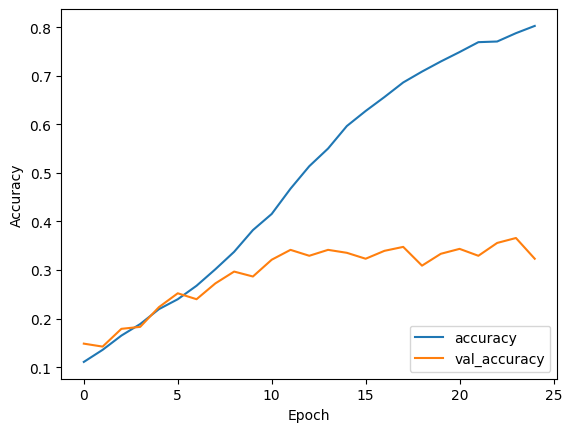

In [58]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

history.history
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)